In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei','Songti SC','STFangsong']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [29]:
img=cv2.imread("../../../img/3.jfif")

## 缩放resize


Text(0.5, 1.0, '自己手动指定像素')

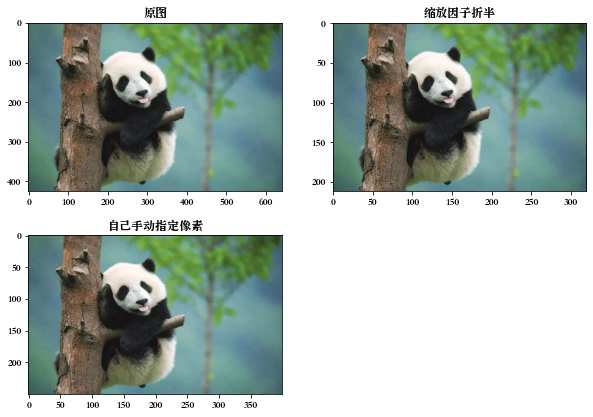

In [30]:
# 使用缩放因子
res=cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_CUBIC)

# 直接指定(width,height)
res2=cv2.resize(img,(400,250),interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(10,7))

plt.subplot(221)
plt.imshow(img[:,:,[2,1,0]])
plt.title("原图")

plt.subplot(222)
plt.imshow(res[:,:,[2,1,0]])
plt.title("缩放因子折半")

plt.subplot(223)
plt.imshow(res2[:,:,[2,1,0]])
plt.title("自己手动指定像素")

坐标轴已经变咧，减半了

## 平移

Text(0.5, 1.0, '正常行列的平移')

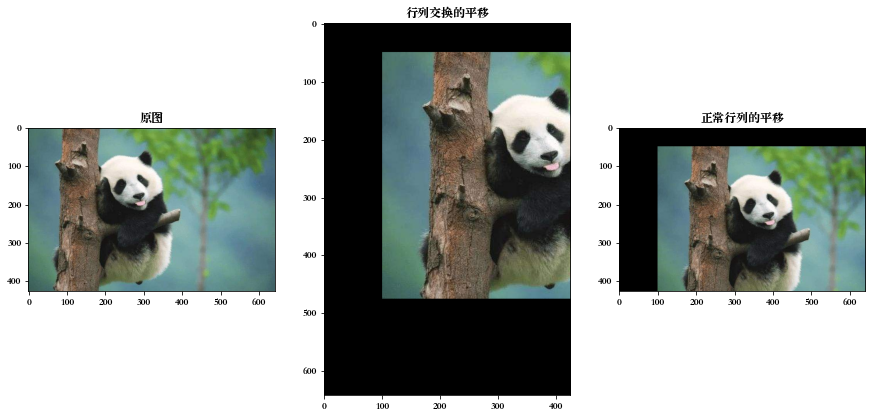

In [72]:
M = np.float32([[1,0,100],[0,1,50]])
row,col=img.shape[0],img.shape[1]
dst = cv2.warpAffine(img,M,(col,row))

dst_reverse= cv2.warpAffine(img,M,(row,col))
# 这里注意，是先col，再row（而不是常规的行，列）

plt.figure(figsize=(15,10))

plt.subplot(131)
plt.imshow(img[:,:,[2,1,0]])
plt.title("原图")

plt.subplot(132)
plt.imshow(dst_reverse[:,:,[2,1,0]])
plt.title("行列交换的平移")

plt.subplot(133)
plt.imshow(dst[:,:,[2,1,0]])
plt.title("正常行列的平移")

##  旋转

Text(0.5, 1.0, '旋转')

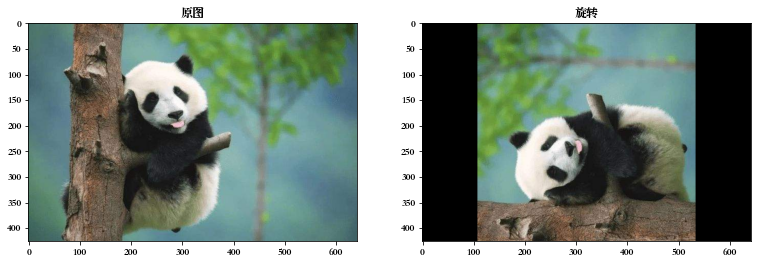

In [61]:
M1=np.array([[0,-1,0],[1,0,0]],dtype=np.float32)
dst1 = cv2.warpAffine(img,M1,(col,row))


M = cv2.getRotationMatrix2D(((col-1)/2.0,(row-1)/2.0),90,1)
dst = cv2.warpAffine(img,M,(col,row))

plt.figure(figsize=(20,10))


plt.subplot(131)
plt.imshow(img[:,:,[2,1,0]])
plt.title("原图")

plt.subplot(132)
plt.imshow(dst[:,:,[2,1,0]])
plt.title("旋转")

## 仿射变换

Text(0.5, 1.0, '仿射变换')

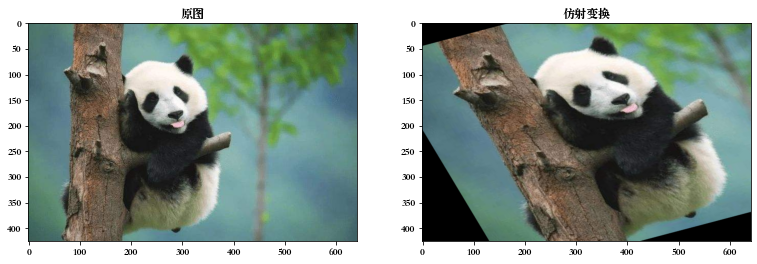

In [64]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(col,row))

plt.figure(figsize=(20,10))


plt.subplot(131)
plt.imshow(img[:,:,[2,1,0]])
plt.title("原图")

plt.subplot(132)
plt.imshow(dst[:,:,[2,1,0]])
plt.title("仿射变换")

In [67]:
M,pts1.shape,pts2.shape

(array([[  1.26666667,   0.6       , -83.33333333],
        [ -0.33333333,   1.        ,  66.66666667]]),
 (3, 2),
 (3, 2))

In [69]:
1.27*50+0.6*50-83.3*1

10.200000000000003

## 透视变换

Text(0.5, 1.0, '透视变换')

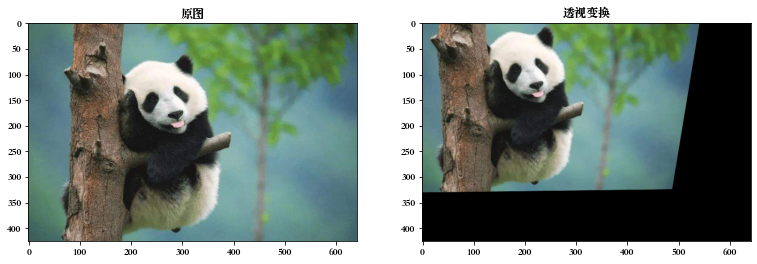

In [74]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(col,row))

plt.figure(figsize=(20,10))


plt.subplot(131)
plt.imshow(img[:,:,[2,1,0]])
plt.title("原图")

plt.subplot(132)
plt.imshow(dst[:,:,[2,1,0]])
plt.title("透视变换")